<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Finite_Difference_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Defference Method

## (1) Abstract
### 1. Goal:

The goal of this course is:
* Learn various types of the first order derivative approximation: FFD, BFD, CFD operators
* Understand convergence rate of operators
* learn python functions



### 2. Problem

Let $f(x) = \sin x$. Plot, with $h = .5$

- its explicit first order derivative $f'$, 
- FFD $\delta_h f$, 
- BFD $\delta_{-h}f$, 
- and CFD $\delta_{\pm h}f$



### 3. Anal 

Given a smooth function $f: \mathbb R \mapsto \mathbb R$, its derivative is

$$f'(x) = \lim_{h\to 0} \frac{f(x+h) - f(x)}{h}.$$

This means, if $h$ is small enough, then

$$f'(x) \simeq  \frac{f(x+h) - f(x)}{h} := \delta_h f.$$

We call $\delta_h$ by Finite Difference (FD) operator. In particular, 
- If $h>0$, then $\delta_h$ is Forward Finite Difference (FFD);
- If $h<0$, then $\delta_h$ is Backward Finite Difference (BFD);
- The average of FFD and BFD is Central Finite Difference (CFD), denoted by

$$\delta_{\pm h} f (x) := \frac 1 2 (\delta_h f (x) + \delta_{-h} f(x)) \simeq f'(x).$$



### 4. Definition(FFD, BFD and CFD)

The definition of **FFD** is as follow:

$$\delta_{h} f(x) = \frac{f(x+h) - f(x)}{h}, \quad h > 0;$$

and for **BFD**

$$\delta_{-h} f(x) = \frac{f(x-h) - f(x)}{-h} = \frac{f(x) - f(x-h)}{h}, \quad h > 0;$$

 and then for **CFD**
 
 $$\delta_{\pm h} f (x) = \frac{f(x+h) - f(x-h)}{2h}, \quad h>0.$$

### 5. Definition(Convergence):

Suppose there exists a sequence of number $X_{h}$ s.t. 

$$\lim_{h \to 0} X_{h} = a, $$

then we say $X_h$ is convergence to a.

If

$$|X_{h} - a| < K h^{\alpha}$$ 

for some $K >0$, then we say $X_{h} \to a$ with order $\alpha$.



### 6. Proposition


- Both FFD and BFD has convergence order $1$; i.e.

$$|\delta_h f(x) - f'(x)| = O(h).$$

- CFD has convergence order $2$.

$$|\delta_{\pm h} f(x) - f'(x)| = O(h^2).$$

### 7. Exercise

Prove the above proposition.

**Proof:**

By the Taylor expansion, we have

$$f(x+h) = f(x) + f'(x)h + \frac{1}{2} f''(x) h^{2} + O(h^{3}),$$

and then 

$$\delta_{h} (x) = f'(x) + \frac{1}{2} f''(x) h + O(h^{2}).$$

Since $f \in C^{2}$, the term $f''(x)$ is bounded. We have

$$|\delta_h f(x) - f'(x)| = |\frac{1}{2} f''(x) + O(h)|h \leq K h,$$

so FFD has convergence order 1. Similarly we know that BFD has convergence order 1. Using the $-h$ to subsititute the $h$, we have

$$\delta_{-h} (x) = f'(x) - \frac{1}{2} f''(x) h + O(h^{2}),$$

and 

$$\delta_{\pm h} f (x) = f'(x) + O(h^{2}).$$

Then we have

$$|\delta_{\pm h} f(x) - f'(x)|= O(h^{2}).$$


## (2) Code for finite differentiation method

We shall import all needed packages first.

In [0]:
import numpy as np
import matplotlib.pyplot as plt


Math operators ffd, bfd, cfd will be defined here as python functions.

In [0]:
def ffd(f, x, h):
    return (f(x+h) - f(x))/h

def bfd(f, x, h):
    return (f(x) - f(x-h))/h

def cfd(f, x, h):
    return (f(x+h) - f(x-h))/h/2



Next, for the original function $f(x) = \sin x$, 
we shall plot its exact derivative
$$f'(x) = \cos x, $$
then, with $h = .5$, plot
-  ffd $\delta_h f$, 
-  bfd $\delta_{-h}f$, 
- and cfd $\delta_{\pm}f$

From the graph, it is obvious that cfd is the closest one to original $f'$.

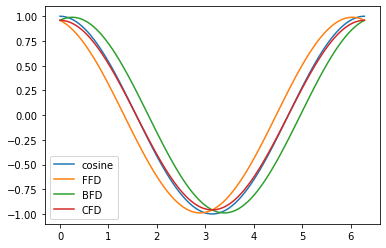

In [0]:
h = .5 #step size
x_co = np.linspace(0, 2*np.pi, 100)

plt.plot(x_co, np.cos(x_co), label = 'cosine')
plt.plot(x_co, ffd(np.sin, x_co, h), label = 'FFD')
plt.plot(x_co, bfd(np.sin, x_co, h), label = 'BFD')
plt.plot(x_co, cfd(np.sin, x_co, h), label = 'CFD')
plt.legend()

## (3) Demonstrate the convergence rate

### 1. Problem

Let $f(x) = \sin x$. We shall demonstrate its FFD convergence rate being $1$. 

### 2. Anal 

Given a smooth function $f: \mathbb R \mapsto \mathbb R$, recall that FFD is defined by

$$f'(x) \simeq  \frac{f(x+h) - f(x)}{h} := \delta_h f.$$

Moreover, FFD has convergence order $1$; i.e.

$$|\delta_h f(x) - f'(x)| = O(h) \simeq K h.$$


A usual approach to demonstrate the convergence rate $1$ is as follows. Let's denote the aboslute error term (the left hand side of the above equation) as
$\epsilon(h)$ and its convergence rate is $\alpha$, then the error term behaves as

$$\epsilon(h) \simeq K h^\alpha.$$

To demonstrate its convergence rate being $1$, we want to visualize $\alpha =1$. To proceed, we could compute $\epsilon(h)$ for the values

$$h \in \{2^{-n}: n = 5, 6, \ldots, 10\}.$$

Write 

$$\epsilon_n = \epsilon(2^{-n}) \simeq K 2^{-n\alpha}.$$

Take $log_2$ both sides, we have

$$\log_2 \epsilon_n \simeq \log_2 K -  \alpha \cdot n.$$

We can plot a $n$ vs $\ln \epsilon_n$ as $n$ varies from small number to a big number.
If the convergence analysis is correct, the plot shall show a line with slope $\alpha$.

### 3. Example:

Verify FFD convergence rate with at $\pi/3$ with $h = 2^{-n}$, where $n$ ranges from 5 to 10.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

finite difference operators

In [0]:
def ffd(f, x, h):
    return (f(x+h) - f(x))/h

def bfd(f, x, h):
    return (f(x) - f(x-h))/h

def cfd(f, x, h):
    return (f(x+h) - f(x-h))/h/2


In [0]:
x_target = np.pi/3 #target point to be examined
y_target = np.cos(x_target) #exact derivative value at the target point

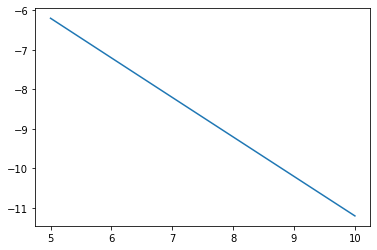

In [0]:
nn = np.arange(5, 11)
hh = 1/np.power(2, nn) #step sizes to be taken
err = ffd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is 1.0015334755314456


So, from the above code, we can see the FFD converdence rate is 1. For the CFD, we can do same thing as before.

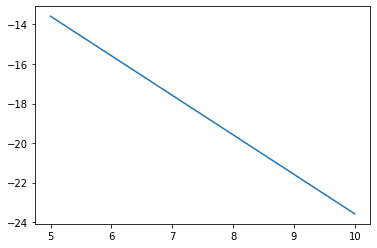

In [0]:
err2 = cfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy2 = np.log2(np.abs(err2))
plt.plot(nn, yy2)

In [0]:
out2 = ss.linregress(nn,yy2)
print('the convergence order is ' + str(-out2[0]))

the convergence order is 1.99998839994406


So we can see the CFD converdence rate is 2.

## (4) The second order derivative approximation by finite difference method


### 1. Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate
    


### 2. Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

### 3. Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $2$.

__Proof__ 

For the second order central finite different, we have

$$\delta_{h} \delta_{-h} f(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

Recall the Taylor series expansion for $f(x + h)$ and $f(x-h)$ at $x$, when$f \in C^{4} (\mathbb{R})$ and $f^{(4)}(x) \neq 0$, we have

$$f(x+h) = f(x) + f'(x) h + \frac{1}{2} f''(x) h^{2} + \frac{1}{3!} f^{(3)}(x) h^{3} + O(h^{4}), $$

and 

$$f(x-h) = f(x) - f'(x) h + \frac{1}{2} f''(x) h^{2} - \frac{1}{3!} f^{(3)}(x) h^{3} + O(h^{4}), $$

such that

$$f(x+h) + f(x-h) -2f(x)= f''(x) h^{2} +O(h^{2}).$$

So by the definition of second order central finite different, we have

$$\delta_{h} \delta_{-h} f(x) = f''(x) + O(h^{2}),$$

and then

$$|\delta_{h} \delta_{-h} f(x) - f''(x)| = O(h^{2}).$$

By the definition of convergence order, we know that the central finite difference for the second order has convergence order $2$.

**A Commen**

Recall the general form of Taylor expansion, we have

$$f(x+h) = \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} h^{k},$$ 
 and 

$$f(x-h) = \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} (-h)^{k},$$

such that

$$f(x+h) + f(x-h) =  \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} \Big(h^{k} + (-h)^{k} \Big) = 2 \sum_{n = 0}^{+ \infty} \frac{f^{(2n)}(x)}{(2n)!} h^{2n}.$$

Then we have

$$\delta_{h} \delta_{-h} f(x) - f''(x) = 2 \sum_{n = 2}^{+ \infty} \frac{f^{(2n)}(x)}{(2n)!} h^{2n-2}.$$

When $f^{(4)}(x) \neq 0$, we know that the central finite difference for the second order has convergence order 2. But when $f^{(4)} (x) = 0$ and there exists $m > 2$ and $f^{(2m)}(x) \neq 0$, the convergence rate will be more higher. 

And consider a speical case $f(x) = sin(x)$, we know that

$$f^{(n)} (x) = sin(\frac{n \pi}{2} + x).$$

For $x = \pi$ and $k \in \mathbb{N}$, we have

$$f^{(2k)} (x) = sin(k \pi + x) = 0,$$

such that

$$\delta_{h} \delta_{-h} f(x) - f''(x) = 0.$$


### 4. Code

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [0]:
def sfd(f, x, h):
    return (f(x+h) + f(x-h) - 2 * f(x)) / (h**2)

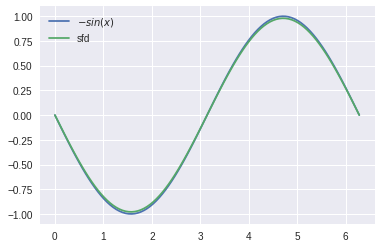

In [0]:
h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

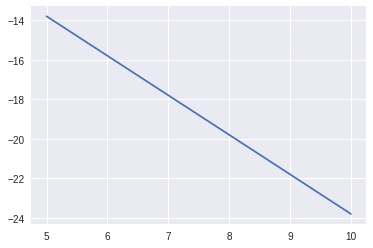

In [0]:
x_target = np.pi/3   #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn)  #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target  #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is 2.0005977409820144


We can change the point  𝑥  from  𝑥=𝜋/3  to  𝑥=𝜋 , then we can see that:

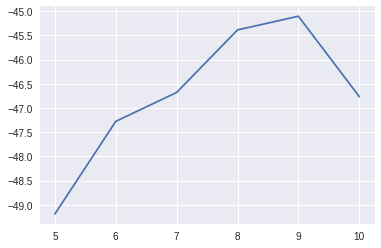

In [0]:
x_target = np.pi   #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn)  #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target  #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)


In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is -0.5694234610294954


The convergence order is a negative number, it is unreasonable. Such that in this phenomenon, we can use this method to measure the speed of convergence. One interpretation is when n is big enough, the bias between the estimator and target value is very small. In this condition the accuracy may not be improved.